# Práctica 2: Exploración de datos con pandas

# Importar módulos

In [22]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

## 1. Obtener 3 datasets

Los datasets escogidos son:
- [Iris](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
- [Calidad de vino tinto](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
- [Incendios forestales](https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv)

## 2. Cargarlos con pandas y mostrar el histograma

In [254]:
wine_df = pd.read_csv('winequality-red.csv', header=0, delimiter=';')
iris_df = pd.read_csv('iris.csv', delimiter=',', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class'])
fires_df = pd.read_csv('forestfires.csv',header=0)

### Preprocesamiento



In [350]:
processed_iris=pd.get_dummies(iris_df)

processed_wine = wine_df.copy()

quality_type = pd.CategoricalDtype(
    categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    ordered=True
)

processed_wine['quality'] = processed_wine['quality'].astype(quality_type)

month_type = pd.CategoricalDtype(
    categories=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    ordered=True
)

day_type = pd.CategoricalDtype(
    categories=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'],
    ordered=True
)

processed_fires = fires_df.copy()
processed_fires['month'] = processed_fires['month'].astype(month_type)
processed_fires['day'] = processed_fires['day'].astype(day_type)


#It's between 0 and 1.5k, but skewed towards 0, so a log representation is  more useful
processed_fires['area'] = np.log(processed_fires['area']+1) 


plt.show()


### Histogramas

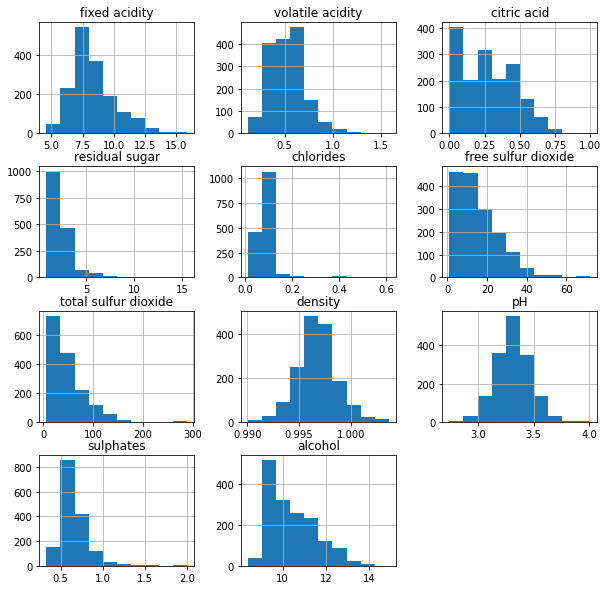

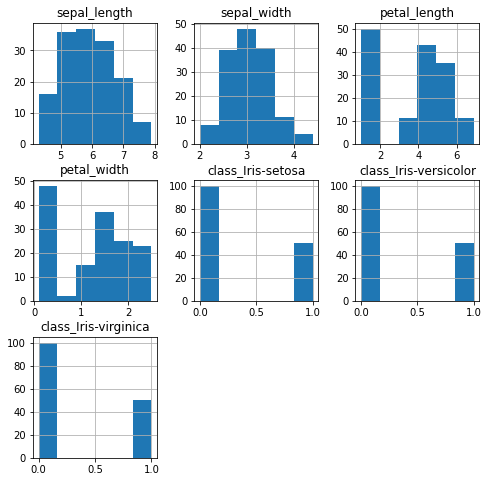

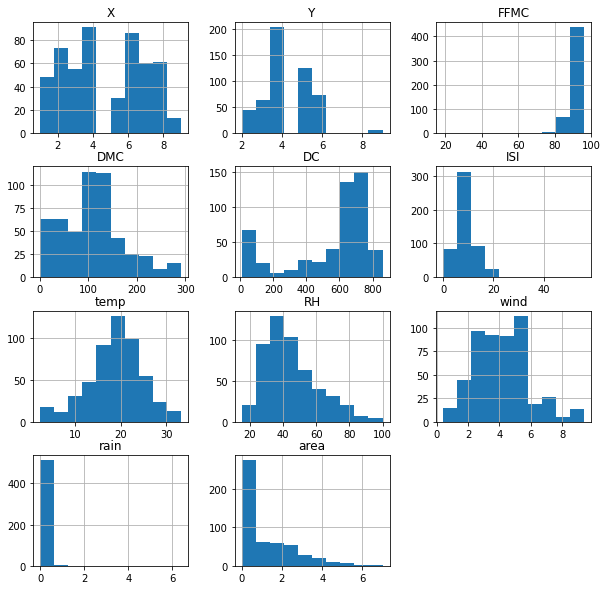

In [351]:
processed_wine.hist(figsize=[10,10])
processed_iris.hist(figsize=[8,8], bins=6)
processed_fires.hist(figsize=[10,10])

plt.show()

Con estos histogramas podemos ver la distribución de cada atributo (excepto los que hemos dejado como nominales, para los que necesitaríamos un gráfico de barras como estos:

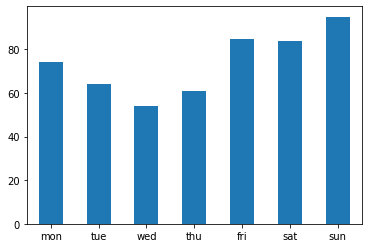

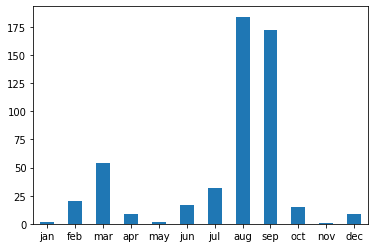

In [337]:
processed_fires['day'].value_counts(sort=False).plot.bar(rot=0)
plt.show()

processed_fires['month'].value_counts(sort=False).plot.bar(rot=0)
plt.show()

## 3. Efectos de normalizar y estandarizar el dataset

In [338]:
def standardize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.StandardScaler()
    
    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res

def normalize(df: pd.DataFrame):
    res = df.copy()
    scaler = preprocessing.MinMaxScaler()
    
    num_df = df.select_dtypes(exclude=['object', 'category'])
    res[num_df.columns] = scaler.fit_transform(num_df)
    return res
    

In [352]:
standard_fires = standardize(processed_fires)
normalized_fires = normalize(processed_fires)

standard_iris = standardize(processed_iris)
normalized_iris = normalize(processed_iris)

standard_wine = standardize(processed_wine)
normalized_wine = normalize(processed_wine)


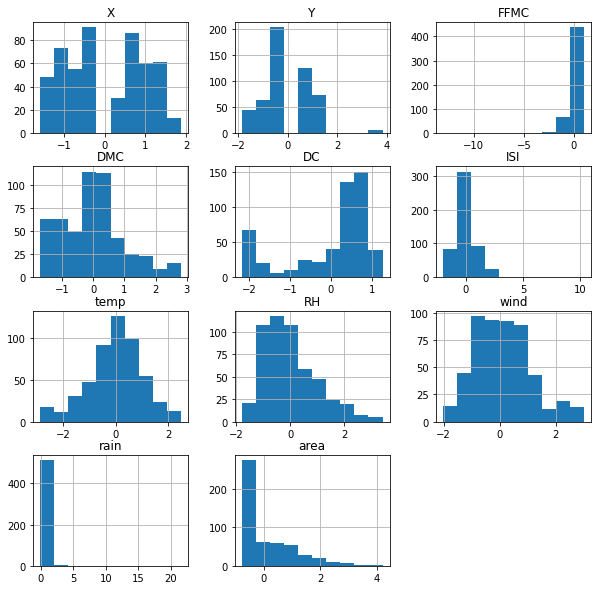

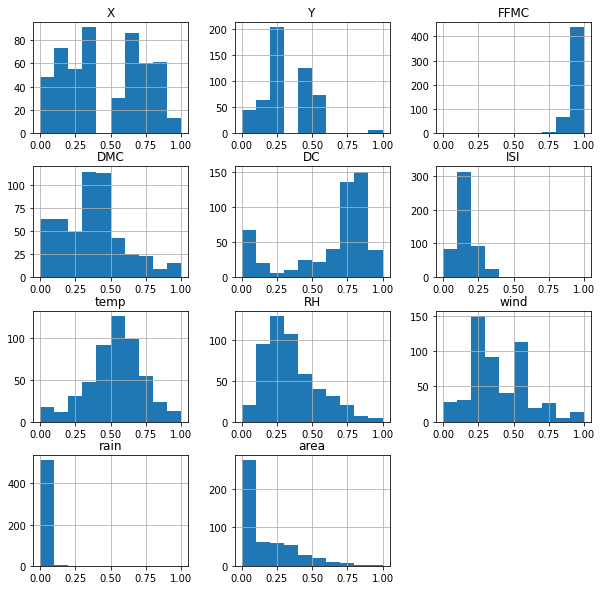

In [340]:
standard_fires.hist(figsize=(10,10))
normalized_fires.hist(figsize=(10,10))

plt.show()

La normalización y la estandarización tienen eel efecto en los histogramas de cada atributo por separado, de mantener la misma forma cambiando el rango.

Si mostramos todos los atributos en un único histograma podremos apreciarlos mejor:

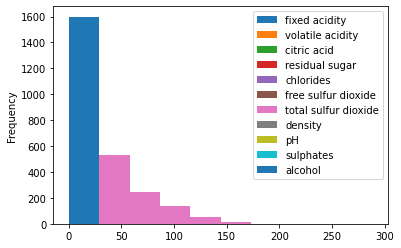

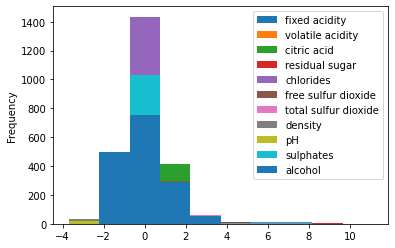

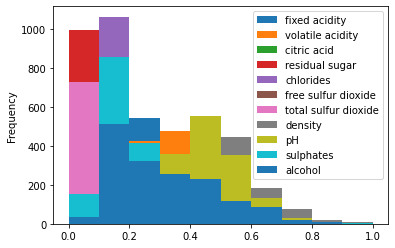

In [353]:
processed_wine.plot.hist()
standard_wine.plot.hist()
normalized_wine.plot.hist()
plt.show()

En este caso, la gráfica estandarizada nos permite tenerlas en un rango similar donde podemos apreciar su distribución, mientras que normalizada al intervalo $[0,1]$ pierde algo de información sobre la distribución relativa, pero nos permite tenerlos en el mismo rango, lo que es útil para compararlas.

# 5. Scatter plot

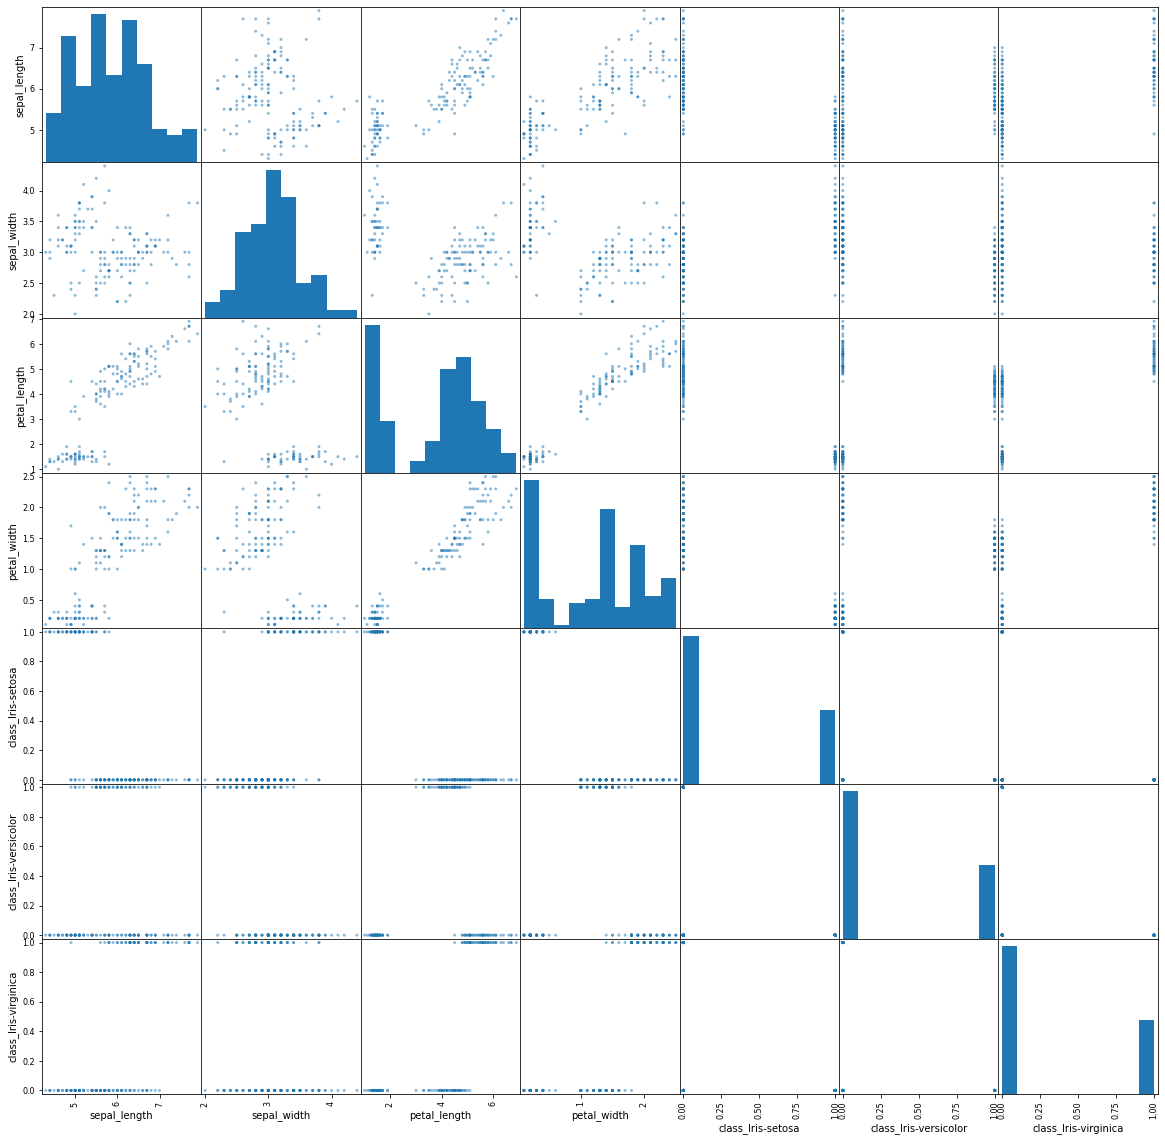

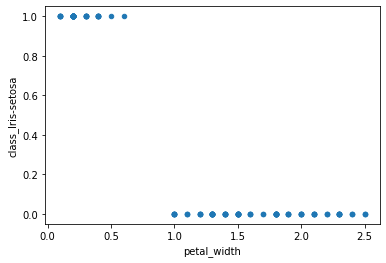

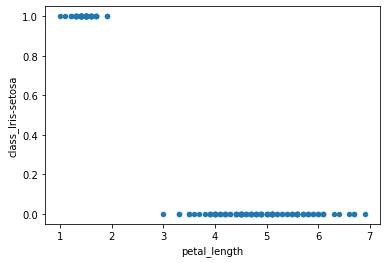

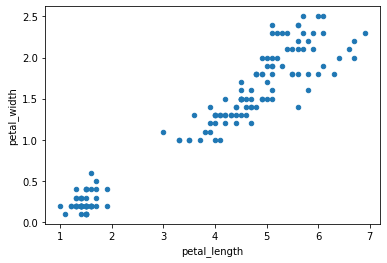

In [342]:
pd.plotting.scatter_matrix(processed_iris, figsize=(20,20))
processed_iris.plot.scatter(x='petal_width', y='class_Iris-setosa')
processed_iris.plot.scatter(x='petal_length', y='class_Iris-setosa')
processed_iris.plot.scatter(x='petal_length', y='petal_width')

plt.show()

Podemos ver, por ejemplo, que las Iris con longitud de pétalo menor a 3 o anchura menor a 1 son todas Setosa, o apreciar la correlación entre la longitud y la anchura del pétalo. También se aprecian _clusters_, que podrían coincidir con alguna de las clases.

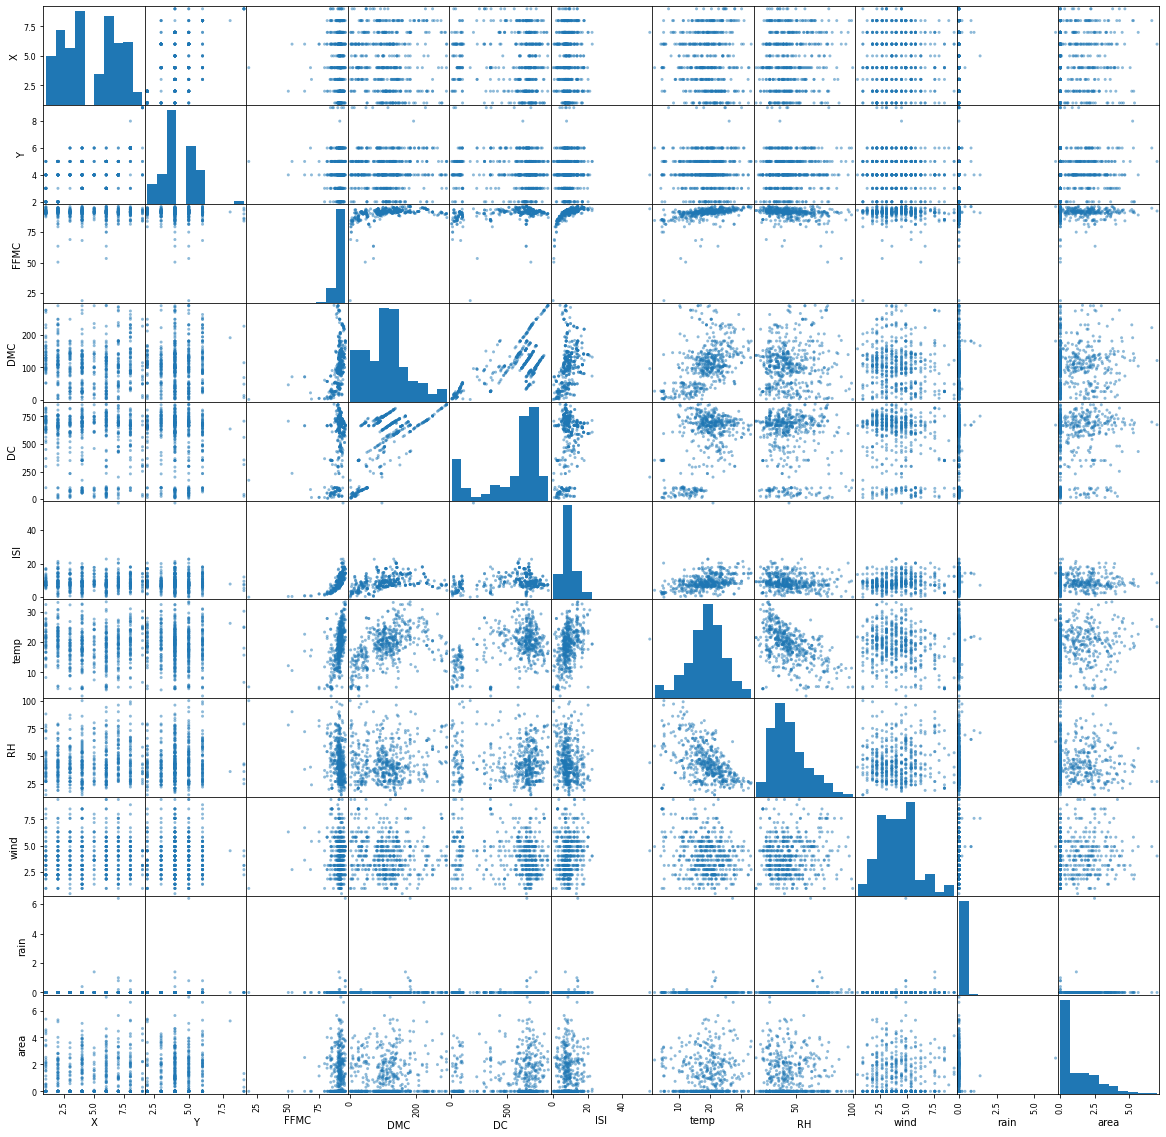

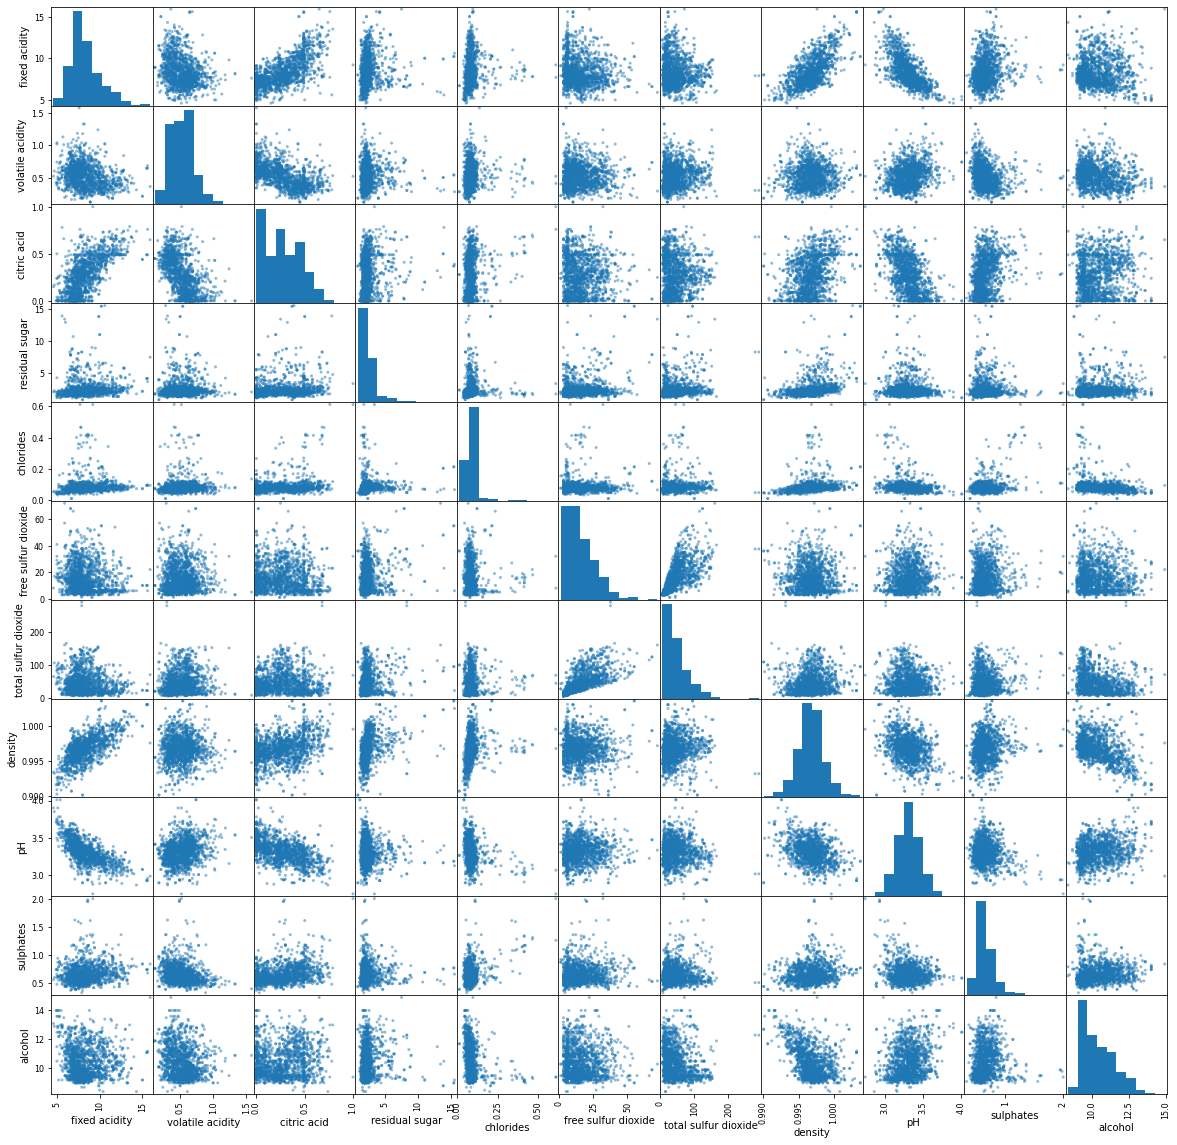

In [354]:
pd.plotting.scatter_matrix(processed_fires, figsize=(20,20))
pd.plotting.scatter_matrix(processed_wine, figsize=(20,20))

plt.show()

En general, los diagramas de dispersión, especialmente en forma de matriz, nos permiten apreciar mejor la relación entre las distintas variables, localizar posibles patrones y, en caso de usar distintos marcadores o colores para cada clase, incluso detectar qué atributos aportan más información y cuáles son irrelevantes.

## 6. Normalización y estandarización en diagramas

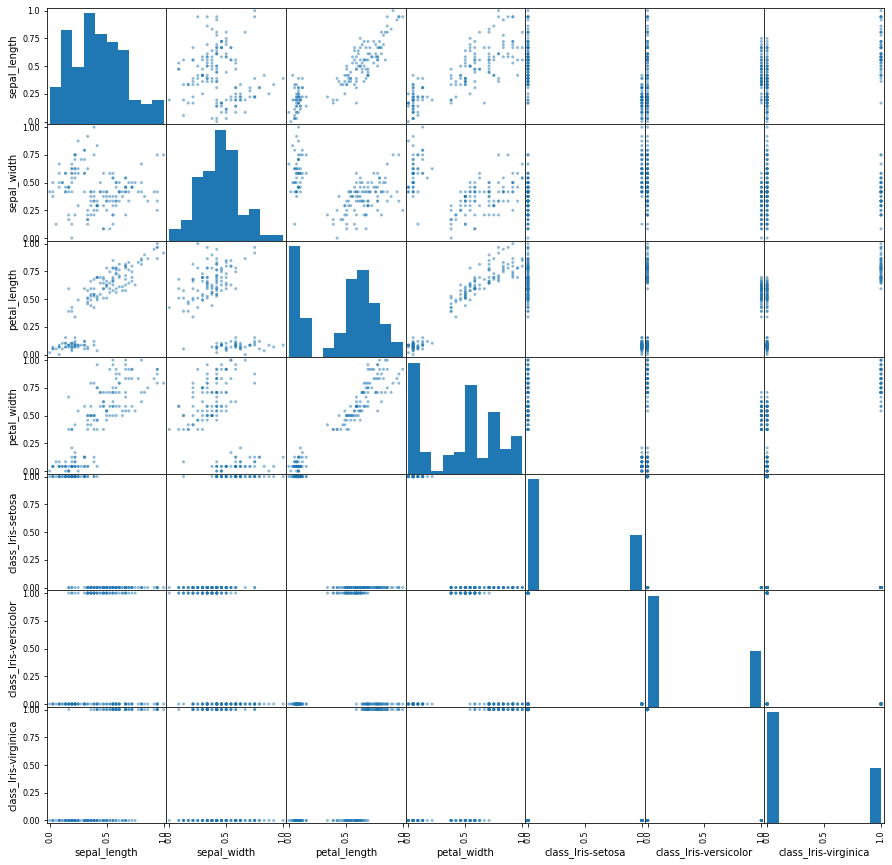

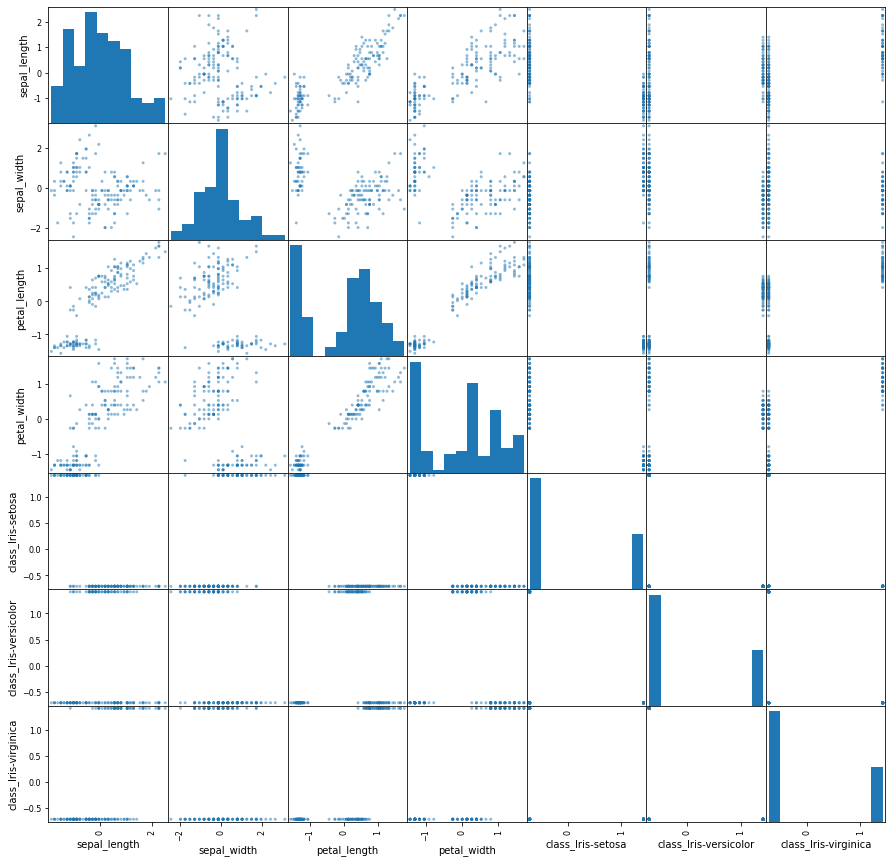

In [344]:
pd.plotting.scatter_matrix(normalized_iris, figsize=(15,15))
pd.plotting.scatter_matrix(standard_iris, figsize=(15,15))
plt.show()

De nuevo, la estandarización y la normalización no intervienen en la forma ni la distribución, sino en el rango de valores.

## 8. Diagrama de correlaciones

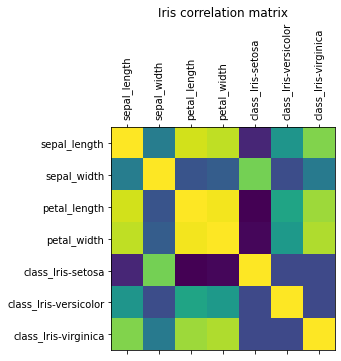

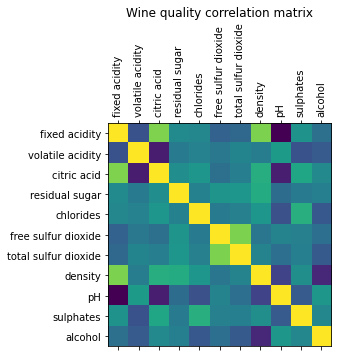

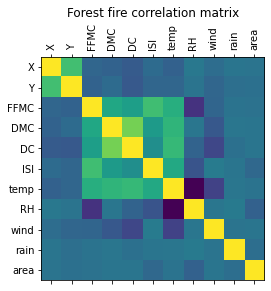

In [355]:
plt.matshow(processed_iris.corr())
plt.xticks(range(len(processed_iris.columns)), processed_iris.columns, rotation='vertical')
plt.yticks(range(len(processed_iris.columns)), processed_iris.columns)
plt.title("Iris correlation matrix")


num_wine = processed_wine.select_dtypes('number')
plt.matshow(num_wine.corr())
plt.xticks(
    range(len(num_wine.columns)), num_wine.columns, rotation='vertical'
)
plt.yticks(
    range(len(num_wine.columns)), num_wine.columns
)
plt.title("Wine quality correlation matrix")


num_fires = processed_fires.select_dtypes('number')
plt.matshow(num_fires.corr())
plt.xticks(
    range(len(num_fires.columns)), num_fires.columns, rotation='vertical'
)

plt.yticks(
    range(len(num_fires.columns)),
    num_fires.columns
)
plt.title("Forest fire correlation matrix")

plt.show()



## 9. Representación en coordenadas paralelas

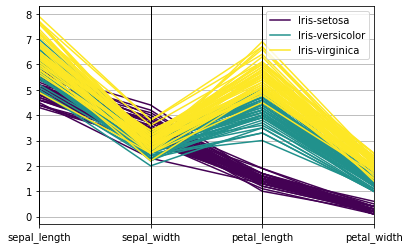

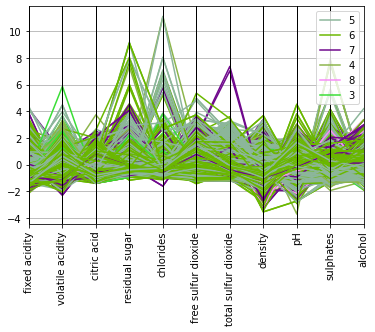

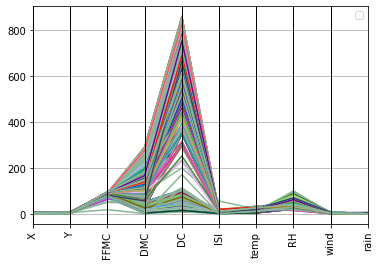

In [356]:
pd.plotting.parallel_coordinates(iris_df, class_column='class', colormap='viridis')
plt.show()

pd.plotting.parallel_coordinates(standard_wine, class_column='quality')
plt.xticks(rotation='vertical')
plt.show()

pd.plotting.parallel_coordinates(fires_df.select_dtypes('number'), class_column='area')
plt.xticks(rotation='vertical')
plt.legend([])
plt.show()

En este caso, la representación en coordenadas paralelas aporta información sobre todo en el caso de Iris, pues podemos ver también la separación entre las Setosa y el resto según el tamaño de los pétalos. El caso del conjunto Forest Fires, al ser "area", una variable continua, no podemos apreciar gran cosa. Podríamos, por ejemplo, discretizarla en intervalos.
En el caso de Wine Quality, reduciento las clases que se muestran o el número de atibutos debería ser suficiente.